# Menyelesaikan Permasalahan Perusahaan Edutech

* Nama: Rizal Gibran Aldrin
* Email: gibran.aldrin.p@gmail.com
* Id Dicoding: ergeape

# Persiapan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'
df = pd.read_csv(url)

In [3]:
print(df.head())

   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...                         1     

# Data Undersatanding

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
print(df.describe())

        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0                 1.093082    2

In [6]:
# Cek nilai null
print(df.isnull().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [7]:
print(df.duplicated().sum())

0


## EDA

In [8]:
print(df['Attrition'].unique())

[nan  1.  0.]


In [9]:
print(df['Attrition'].value_counts(dropna=False))

Attrition
0.0    879
NaN    412
1.0    179
Name: count, dtype: int64


In [10]:
# Hitung jumlah attrition berdasarkan job satisfaction
attrition_by_job_satisfaction = df.groupby('JobSatisfaction')['Attrition'].value_counts().unstack()
attrition_by_job_satisfaction

Attrition,0.0,1.0
JobSatisfaction,,
1,159,46
2,163,32
3,256,62
4,301,39


Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


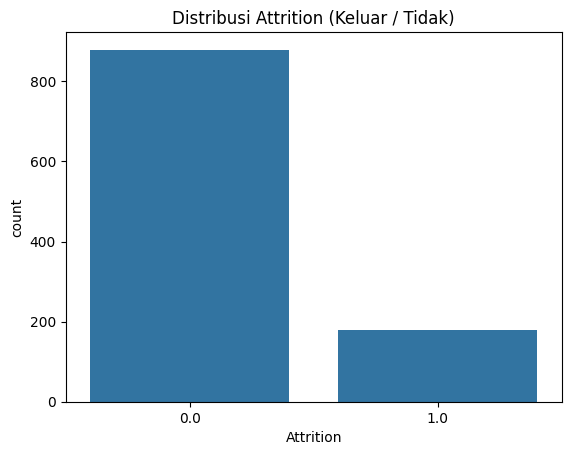

In [11]:
# Distribusi target (Attrition)
print(df['Attrition'].value_counts(normalize=True))

# Visualisasi
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition (Keluar / Tidak)')
plt.show()

In [12]:
# Nama dan jumlah masing-masing pekerjaan dari setiap departemen

# Mengelompokkan data berdasarkan departemen dan pekerjaan, lalu menghitung jumlahnya
job_counts = df.groupby(['Department', 'JobRole'])['EmployeeId'].count().reset_index()
job_counts = job_counts.rename(columns={'EmployeeId': 'jumlah_karyawan'})

# Menampilkan hasil
job_counts

,Department,JobRole,jumlah_karyawan
0,Human Resources,Human Resources,52
1,Human Resources,Manager,11
2,Research & Development,Healthcare Representative,131
3,Research & Development,Laboratory Technician,259
4,Research & Development,Manager,54
5,Research & Development,Manufacturing Director,145
6,Research & Development,Research Director,80
7,Research & Development,Research Scientist,292
8,Sales,Manager,37
9,Sales,Sales Executive,326


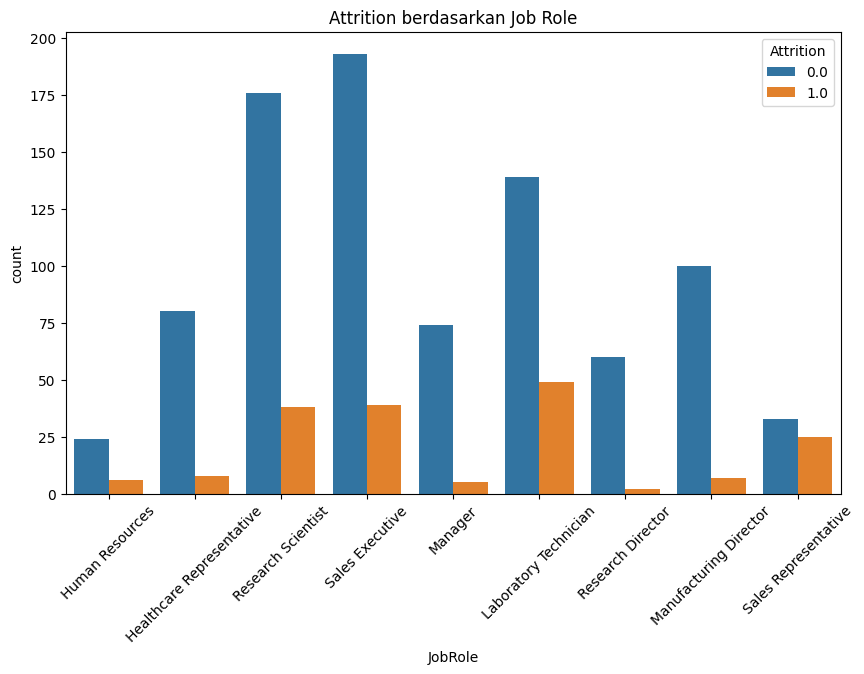

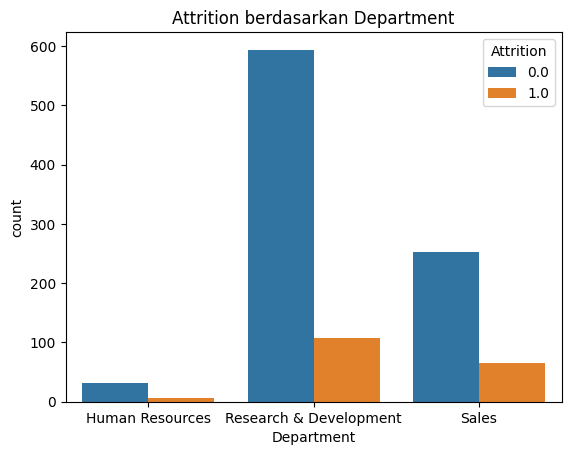

In [13]:
# Attrition vs Job Role
plt.figure(figsize=(10,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition berdasarkan Job Role')
plt.xticks(rotation=45)
plt.show()

# Attrition vs Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition berdasarkan Department')
plt.show()

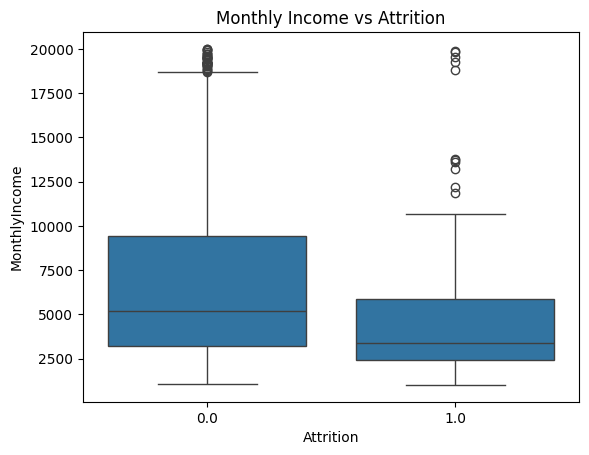

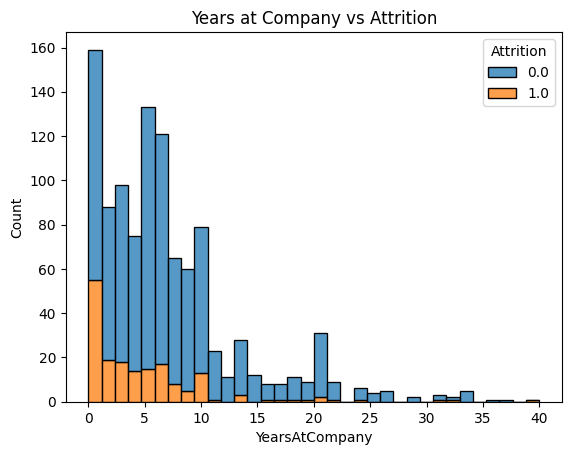

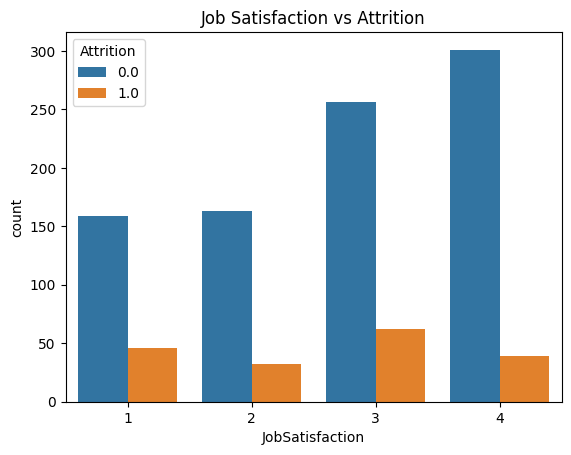

In [14]:
# Boxplot Income vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# Histogram YearsAtCompany
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack')
plt.title('Years at Company vs Attrition')
plt.show()

# Job Satisfaction vs Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()

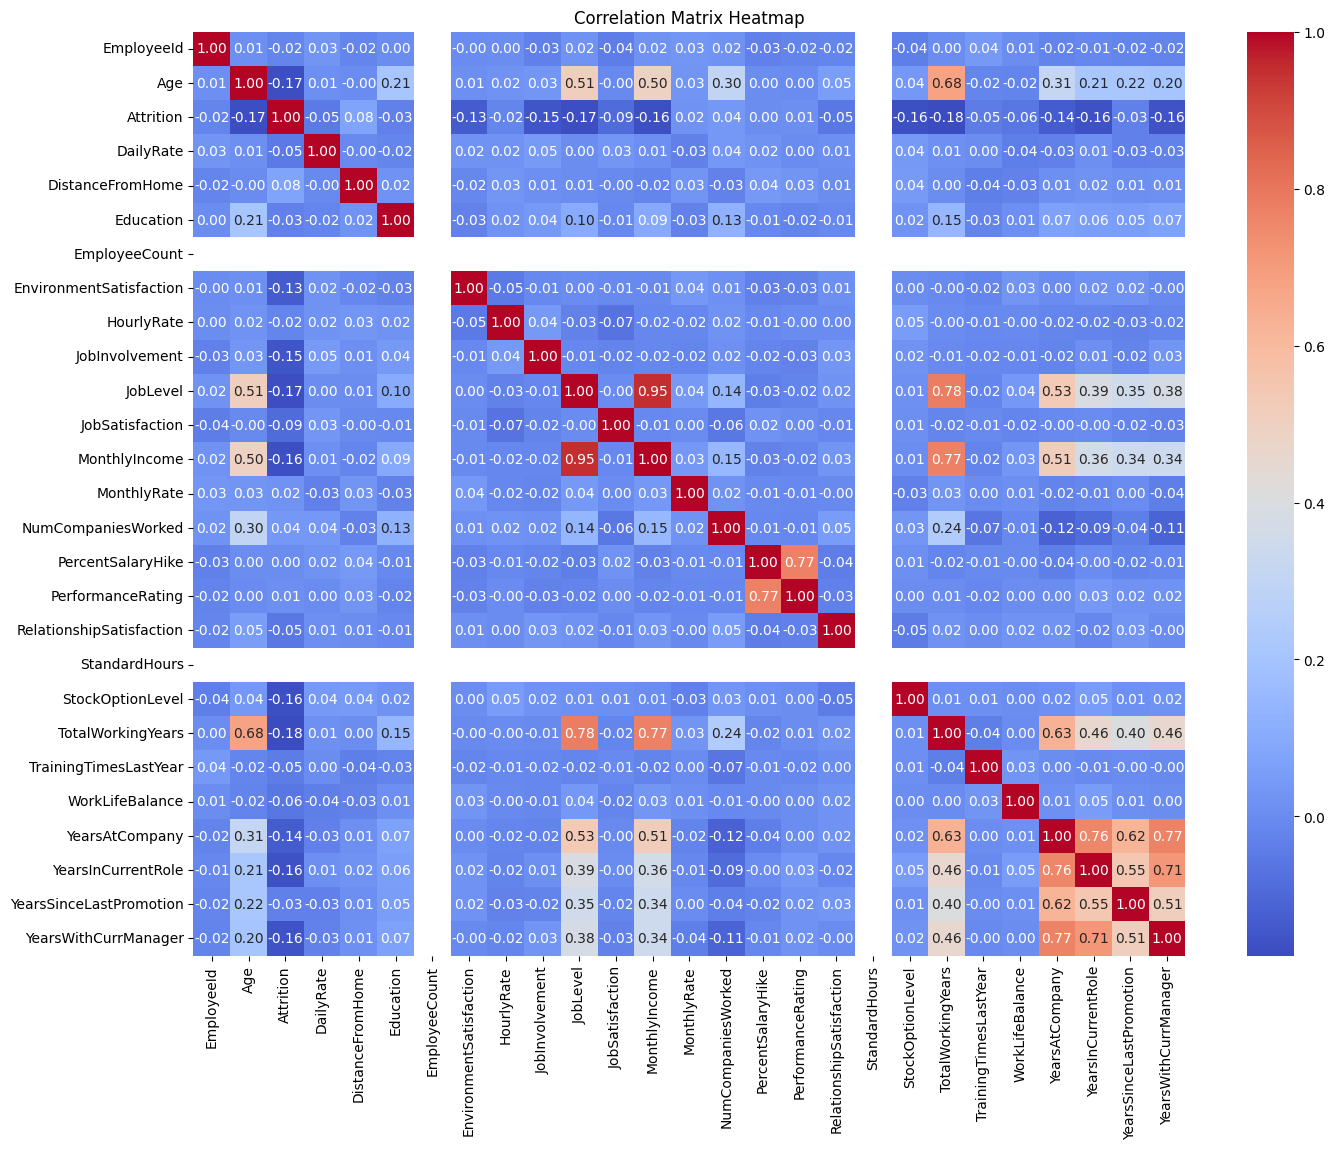

In [15]:
# Create a heatmap of correlation matrix
plt.figure(figsize=(16, 12))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()  # Calculate correlation on numerical data only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Preparation

## Menangani missing value

In [16]:
# Drop rows with missing values
df = df.dropna(subset=['Attrition'])

# Check for missing values again to confirm
print(df.isnull().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Encoding

In [17]:
encoders = {}
categorical_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [18]:
data = df.copy()

In [19]:
# Label encoding untuk kolom kategorik
for col in categorical_cols:
    le = LabelEncoder()
    data.loc[:, col] = le.fit_transform(data[col])
    encoders[col] = le

In [20]:
features = ['Age', 'Department', 'DistanceFromHome', 'Education',
 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
 'YearsSinceLastPromotion']

## SMOTE & Scalling

In [21]:
# Scaling data
X = data[features]
y = data['Attrition']

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
print(pd.Series(y_resampled).value_counts())

Attrition
1.0    879
0.0    879
Name: count, dtype: int64


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Train-test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Modeling

In [26]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Prediksi
y_pred_lr = lr_model.predict(X_test)

In [83]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42,
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Membangun model XGBoost
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    learning_rate=0.05,
    max_depth=15,
    colsample_bytree=0.2,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [72]:
# model SVM
svm_model = SVC(C=5, kernel='rbf')  # Gunakan kernel linear untuk teks
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi

## Logistic Regression

In [30]:
accuracy_lr= accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression - F1 Score: {f1_lr:.4f}")
print(classification_report(y_test, y_pred_lr))

Logistic Regression - Accuracy: 0.8494
Logistic Regression - F1 Score: 0.8464
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       178
         1.0       0.85      0.84      0.85       174

    accuracy                           0.85       352
   macro avg       0.85      0.85      0.85       352
weighted avg       0.85      0.85      0.85       352



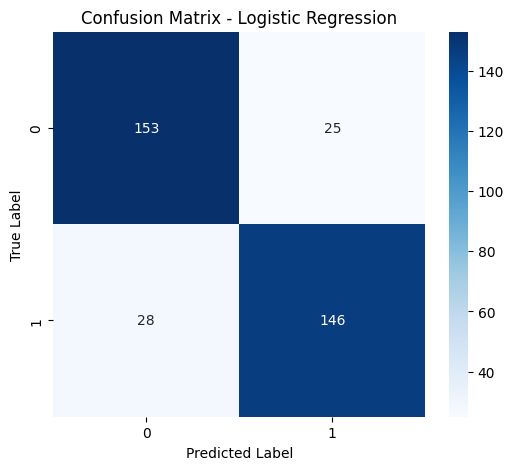

In [31]:
# Visualisasi Confusion Matrix
cfm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cfm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Random Forest

In [84]:
# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.9290
Random Forest - F1 Score: 0.9258
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       178
         1.0       0.96      0.90      0.93       174

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352



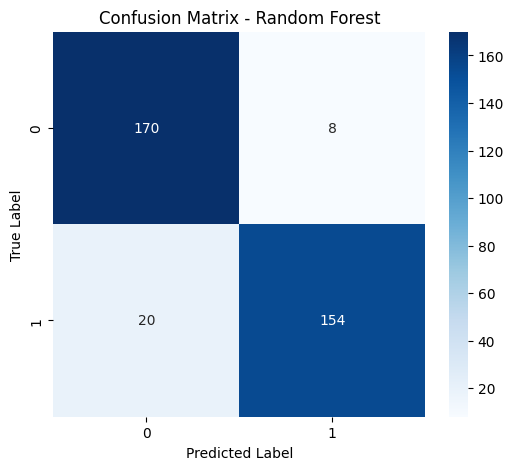

In [33]:
# Visualisasi Confusion Matrix
cfm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cfm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## XGBoost

In [52]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - F1 Score: {f1_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost - Accuracy: 0.9233
XGBoost - F1 Score: 0.9179
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       178
         1.0       0.97      0.87      0.92       174

    accuracy                           0.92       352
   macro avg       0.93      0.92      0.92       352
weighted avg       0.93      0.92      0.92       352



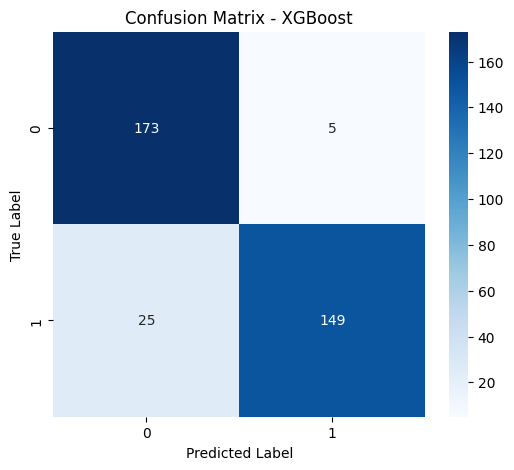

In [50]:
cfm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cfm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

## SVM

In [73]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - F1 Score: {f1_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

SVM - Accuracy: 0.9347
SVM - F1 Score: 0.9348
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       178
         1.0       0.92      0.95      0.93       174

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.94      0.93      0.93       352



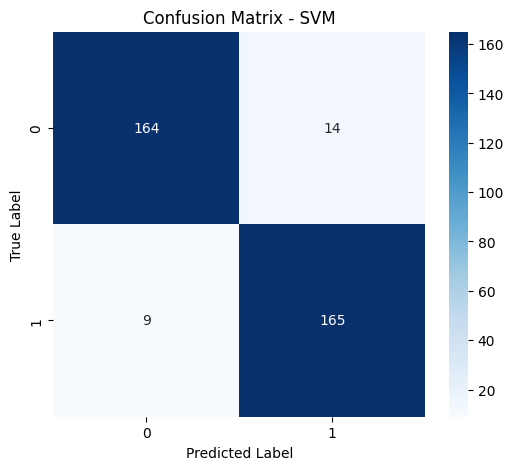

In [74]:
cfm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cfm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

# Save Model

In [85]:
import joblib

In [86]:
joblib.dump(xgb_model, 'model_svm.joblib')

['model_svm.joblib']

In [87]:
joblib.dump(encoders, 'encoders.joblib')

['encoders.joblib']

In [88]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']